<a href="https://colab.research.google.com/github/ricardoandreom/Football-Data-Analysis/blob/main/Football_eventing_odds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How bookmakers make the odds of goals and corners in a football match?

Events in football, such as goals and corners, have an extremely random and apparently unpredictable occurrence but there is a probability distribution associated with these occurrences.



This probability distribution is the famous **Poisson distribuition**. Now, take a look at the mathematical theory of the Poisson distribution if you want.

In probability theory and statistics, the **Poisson distribution** is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

The probability function of a Poisson random variable $X$ with parameter
$\lambda$ is given by:
  
  $\qquad \qquad \qquad p_{X}(x)=\frac{e^{-\lambda}\lambda^x}{x!};\, x=0,1,2,\dots,$ and $\lambda>0$

where $X$
  represents the number of occurrences of an event in a given unit time period, and $\lambda$
  is the constant rate of occurrence per time period.
  

Considering the Poisson distribution but now finally leaving the mathematical theory aside, bookmakers take into account the average occurrence of each event (goals, corners, etc...) at home or away for each team.

 **Sportingindex.com** - team corners, total corners, team goals, total goals expectancies

 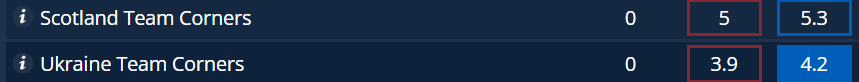

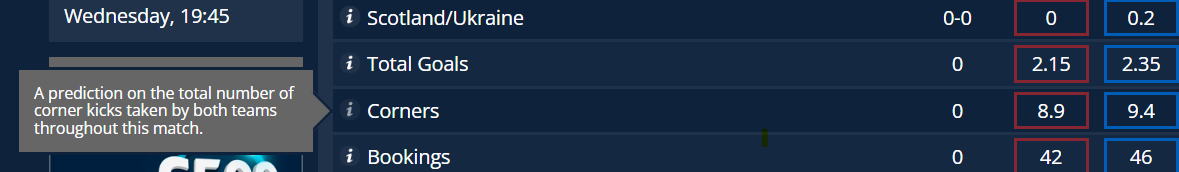

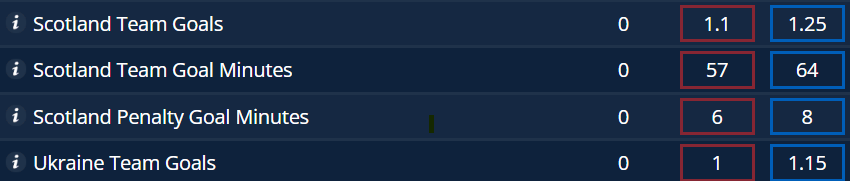

According to this expectancies for corners for each team, **Sportingindex** expect Scotland to have 1 one more corner than Ukraine.

For the code below, let's take the mid point of these expectancies for each team (For corners - 5.15 for Scotland and 4.05 for Ukraine) and for each event. 

Let's use the scipy.stats module and work with the Poisson distribution in python to calculate the probabilities of an event occurring.

Then, I compare the bookmakers odds with our odds calculated in python.

1.   $\qquad \qquad \quad \textrm{odd}=\frac{1}{\textrm{probability of an event occuring}}$
2.   $\qquad \qquad \quad \textrm{margin probability}=\frac{1}{\textrm{real odd}}-\textrm{(poisson "fair" probability)}$





In [9]:
from scipy.stats import poisson

# mean expectancies values
Scotland_goals = 1.175
Ukraine_goals = 1.075
total_goals = 2.25
total_corners = 9.15
Scotland_corners = 5.15
Ukraine_corners = 4.05

In [10]:
# probability - 4 corners exactly for Ukraine 
bet = "4 corners exactly for Ukraine"
poisson_pd = poisson.pmf(k=4,mu=Ukraine_corners)
# fair odd according to this probability
fair_odd = 1/poisson_pd
print("The probability value of {} is {}.\n\nAccording to this probability, the fair_odd value is: {}".format(bet,poisson_pd.round(3), fair_odd.round(2)))


The probability value of 4 corners exactly for Ukraine is 0.195.

According to this probability, the fair_odd value is: 5.12


Real bookmaker odds for Ukraine having less or more than 4 corners.

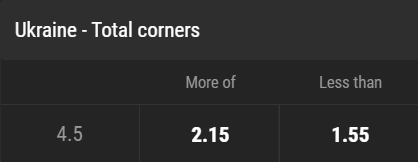

In [12]:
# probability -  less than 4 corners for Ukraine
bet = "less than 4 corners for Ukraine"
poisson_pd = poisson.cdf(k=4,mu=Ukraine_corners)
# fair odd according to this probability
fair_odd = 1/poisson_pd
#real odd
real_odd = float(input('Please enter the real odd:     \n'))
prob_margin = (1/real_odd) - poisson_pd
print("\nAccording to the Poisson distribution, the probability value of {} is {}.\n\nAccording to this probability, the fair_odd value is: {}.\n\nThe bookmaker probability margin is {}%.".format(bet,poisson_pd.round(3), fair_odd.round(2),prob_margin.round(3)*100))
if prob_margin<=0:
  print('\n\033[0;32mGood odd!')
else:
  print('\n\033[1;31mUnfair odd!') 

Please enter the real odd:     
1.55

According to the Poisson distribution, the probability value of less than 4 corners for Ukraine is 0.619.

According to this probability, the fair_odd value is: 1.62.

The bookmaker probability margin is 2.6%.

Unfair odd!


Usually the bookmakers include a margin in the odds to makes that odd "unfair" for the punter. 

According to my margin formula, if the margin is positive then it's an unfair odd for the punter.

Real bookmaker odds for Scotland having less or more than 4 corners.

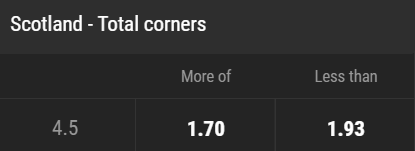

In [ ]:
# probability -  more than 4 corners for Scotland
bet = "more than 4 corners for Scotland"
poisson_pd = 1-poisson.cdf(k=4,mu=Scotland_corners)
poisson_pd
# fair odd according to this probability
fair_odd = 1/poisson_pd
#real odd
real_odd = float(input('Please enter the real odd:     \n'))
prob_margin = (1/real_odd) - poisson_pd
print("\nAccording to the Poisson distribution, the probability value of {} is {}.\n\nAccording to this probability, the fair_odd value is: {}.\n\nThe bookmaker probability margin is {}%.".format(bet,poisson_pd.round(3), fair_odd.round(2),prob_margin.round(3)*100))
if prob_margin<=0:
  print('\n\033[0;32mGood odd!')
else:
  print('\n\033[1;31mUnfair odd!') 

Please enter the real odd:     
1.7

According to the Poisson distribution, the probability value of more than 4 corners for Scotland is 0.585.

According to this probability, the fair_odd value is: 1.71.

The bookmaker probability margin is 0.3%.

Unfair odd!


Real bookmaker odds for the number of total corners in the match.

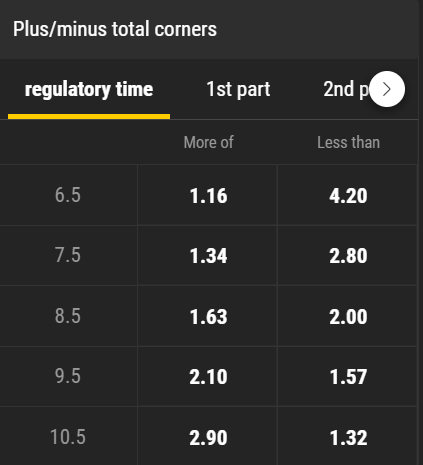

In [ ]:
# probability -  more than 7 total corners in the match
bet = "more than 7 total corners in the match"
poisson_pd = 1-poisson.cdf(k=7,mu=total_corners)
poisson_pd
# fair odd according to this probability
fair_odd = 1/poisson_pd
#real odd
real_odd = float(input('Please enter the real odd:     \n'))
prob_margin = (1/real_odd) - poisson_pd
print("\nAccording to the Poisson distribution, the probability value of {} is {}.\n\nAccording to this probability, the fair_odd value is: {}.\n\nThe bookmaker probability margin is {}%.".format(bet,poisson_pd.round(3), fair_odd.round(2),prob_margin.round(3)*100))
if prob_margin<=0:
  print('\n\033[0;32mGood odd!')
else:
  print('\n\033[1;31mUnfair odd!') 

Please enter the real odd:     
1.34

According to the Poisson distribution, the probability value of more than 7 total corners in the match is 0.693.

According to this probability, the fair_odd value is: 1.44.

The bookmaker probability margin is 5.3%.

Unfair odd!


Real bookmaker odds for Ukraine scoring less or more than a certain number of goals.

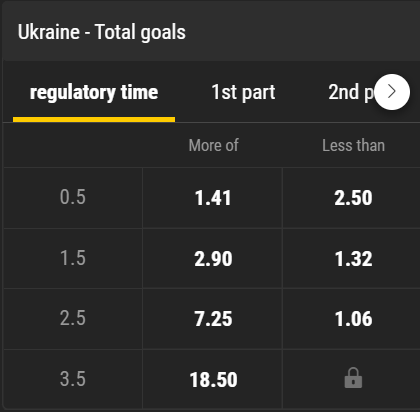

In [ ]:
# probability -  less than 2 goals for Ukraine
bet = "less than 2 goals for Ukraine"
poisson_pd = poisson.cdf(k=2,mu=Ukraine_goals)
# fair odd according to this probability
fair_odd = 1/poisson_pd
#real odd
real_odd = float(input('Please enter the real odd:     \n'))
prob_margin = (1/real_odd) - poisson_pd
print("\nAccording to the Poisson distribution, the probability value of {} is {}.\n\nAccording to this probability, the fair_odd value is: {}.\n\nThe bookmaker probability margin is {}%.".format(bet,poisson_pd.round(3), fair_odd.round(2),prob_margin.round(3)*100))
if prob_margin<=0:
  print('\n\033[0;32mGood odd!')
else:
  print('\n\033[1;31mUnfair odd!') 

Please enter the real odd:     
1.06

According to the Poisson distribution, the probability value of less than 2 goals for Ukraine is 0.905.

According to this probability, the fair_odd value is: 1.1.

The bookmaker probability margin is 3.8%.

Unfair odd!


Real bookmaker odds for Scotland scoring less or more than a certain number of goals.

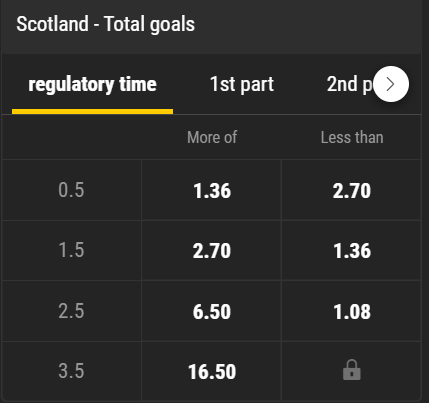

In [ ]:
# probability -  more than 3 goals for Scotland
bet = "more than 3 goals for Ukraine"
poisson_pd = 1-poisson.cdf(k=3,mu=Scotland_goals)
# fair odd according to this probability
fair_odd = 1/poisson_pd
#real odd
real_odd = float(input('Please enter the real odd:     \n'))
prob_margin = (1/real_odd) - poisson_pd
print("\nAccording to the Poisson distribution, the probability value of {} is {}.\n\nAccording to this probability, the fair_odd value is: {}.\n\nThe bookmaker probability margin is {}%.".format(bet,poisson_pd.round(3), fair_odd.round(2),prob_margin.round(3)*100))
if prob_margin<=0:
  print('\n\033[0;32mGood odd!')
else:
  print('\n\033[1;31mUnfair odd!')

Please enter the real odd:     
16.5

According to the Poisson distribution, the probability value of more than 3 goals for Ukraine is 0.032.

According to this probability, the fair_odd value is: 31.6.

The bookmaker probability margin is 2.9000000000000004%.

Unfair odd!


Real bookmaker odds for the number of (less or more) goals in the match.

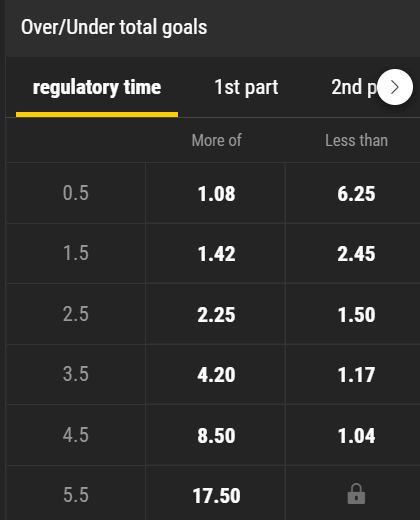

In [ ]:
# probability -  more than 4 goals in the match
bet = "more than 4 goals in the match"
poisson_pd = 1-poisson.cdf(k=4,mu=total_goals)
# fair odd according to this probability
fair_odd = 1/poisson_pd
#real odd
real_odd = float(input('Please enter the real odd:     \n'))
prob_margin = (1/real_odd) - poisson_pd
print("\nAccording to the Poisson distribution, the probability value of {} is {}.\n\nAccording to this probability, the fair_odd value is: {}.\n\nThe bookmaker probability margin is {}%.".format(bet,poisson_pd.round(3), fair_odd.round(2),prob_margin.round(3)*100))
if prob_margin<=0:
  print('\n\033[0;32mGood odd!')
else:
  print('\n\033[1;31mUnfair odd!')

Please enter the real odd:     
8.5

According to the Poisson distribution, the probability value of more than 4 goals in the match is 0.078.

According to this probability, the fair_odd value is: 12.82.

The bookmaker probability margin is 4.0%.

Unfair odd!


As we can see, sadly for us the odds are always "unfair" as we expected because the bookmakers save for themselves a margin.
Let's calculate the mean margin probability and mean margin odd with the values which we obtained through this process.

In [8]:
import pandas as pd
import statistics

# list of margin probabilities
prob_margin_list = [2.6,0.7,5.3,3.8,2.9,4.0]

mean_prob_margin = statistics.mean(prob_margin_list)
print(f'The mean margin probability is {round(mean_prob_margin,3)}% and the mean margin odd is {round((1/mean_prob_margin),3)}.')

The mean margin probability is 3.217% and the mean margin odd is 0.311 .


As we can see, the bookmakers save pretty good margins for themselves to make sure there will be profits. Good bets!